# Explain

In order to do the explanation using shap we need to run tensorflow in lazy execution mode which was the default for Tensorflow 1.0 but is not in 2.0 anymore.
Disabling Eager Execution needs to run early after starting the python runtime and cannot be reverted. I.E. that SHAP explanations need to run in its own jupyter notebook.

In [1]:
import shap
import tensorflow as tf
from keras.models import load_model
from numpy import argmax
from pandas import concat, DataFrame

from data.file import model_convolutional_dataset
from data.load import load_test_dataset
from reporting.evaluation import plot_shap
from reporting.images import display_dataframe

In [2]:
print("SHAP version is      :", shap.__version__)
print("Tensorflow version is:", tf.__version__)

tf.compat.v1.disable_eager_execution()

SHAP version is      : 0.40.0
Tensorflow version is: 2.6.2


## Load Test Data and Model

In [3]:
x_test, y_test = load_test_dataset(normalize=True)
model = load_model(model_convolutional_dataset)

## SHAP

### Test Dataset
Here we are generating shap values and plot them based on the test dataset.

keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


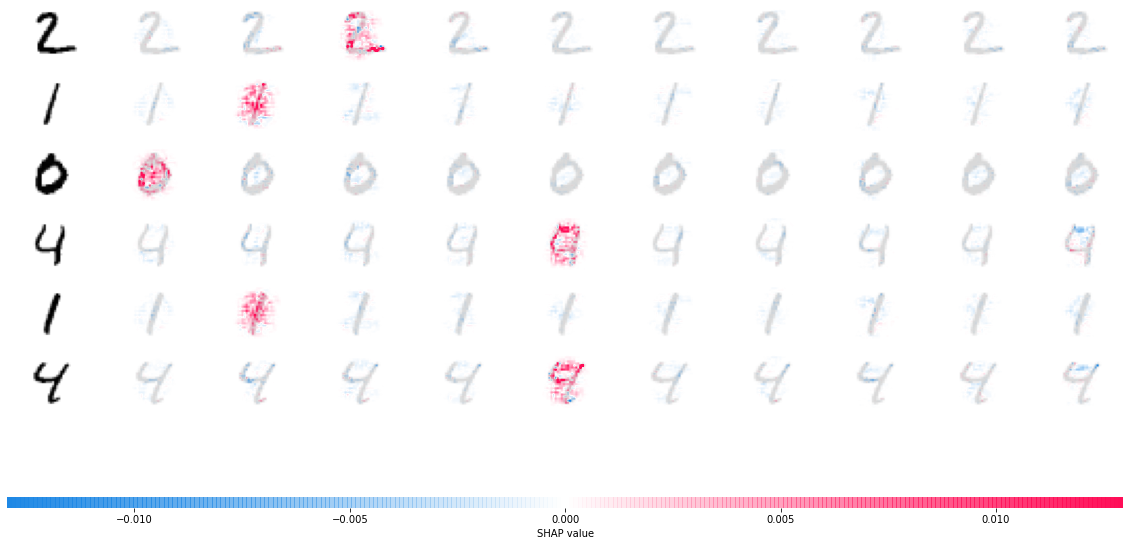

In [4]:
plot_shap(model, x_test, elements=7, population=500)

### Test Dataset (Misspredictions)

The following code predicts n items out of the test dataset.

In [5]:
compare_items = 10000
prediction = [argmax(x) for x in model.predict(x_test[:compare_items])]
expectation = y_test[:compare_items]

comparison = concat([expectation.rename('actual'), DataFrame(prediction, columns=['prediction'])], axis=1)
missmatch_ids = comparison[comparison.prediction != comparison.actual].index

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


In [6]:
comparison_missmatch = comparison.iloc[missmatch_ids]
labels = comparison_missmatch.prediction.map(str) + " (" + comparison_missmatch.actual.map(str) + ")"

### Display missmatches

In [7]:
missmatches = x_test[missmatch_ids]

Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


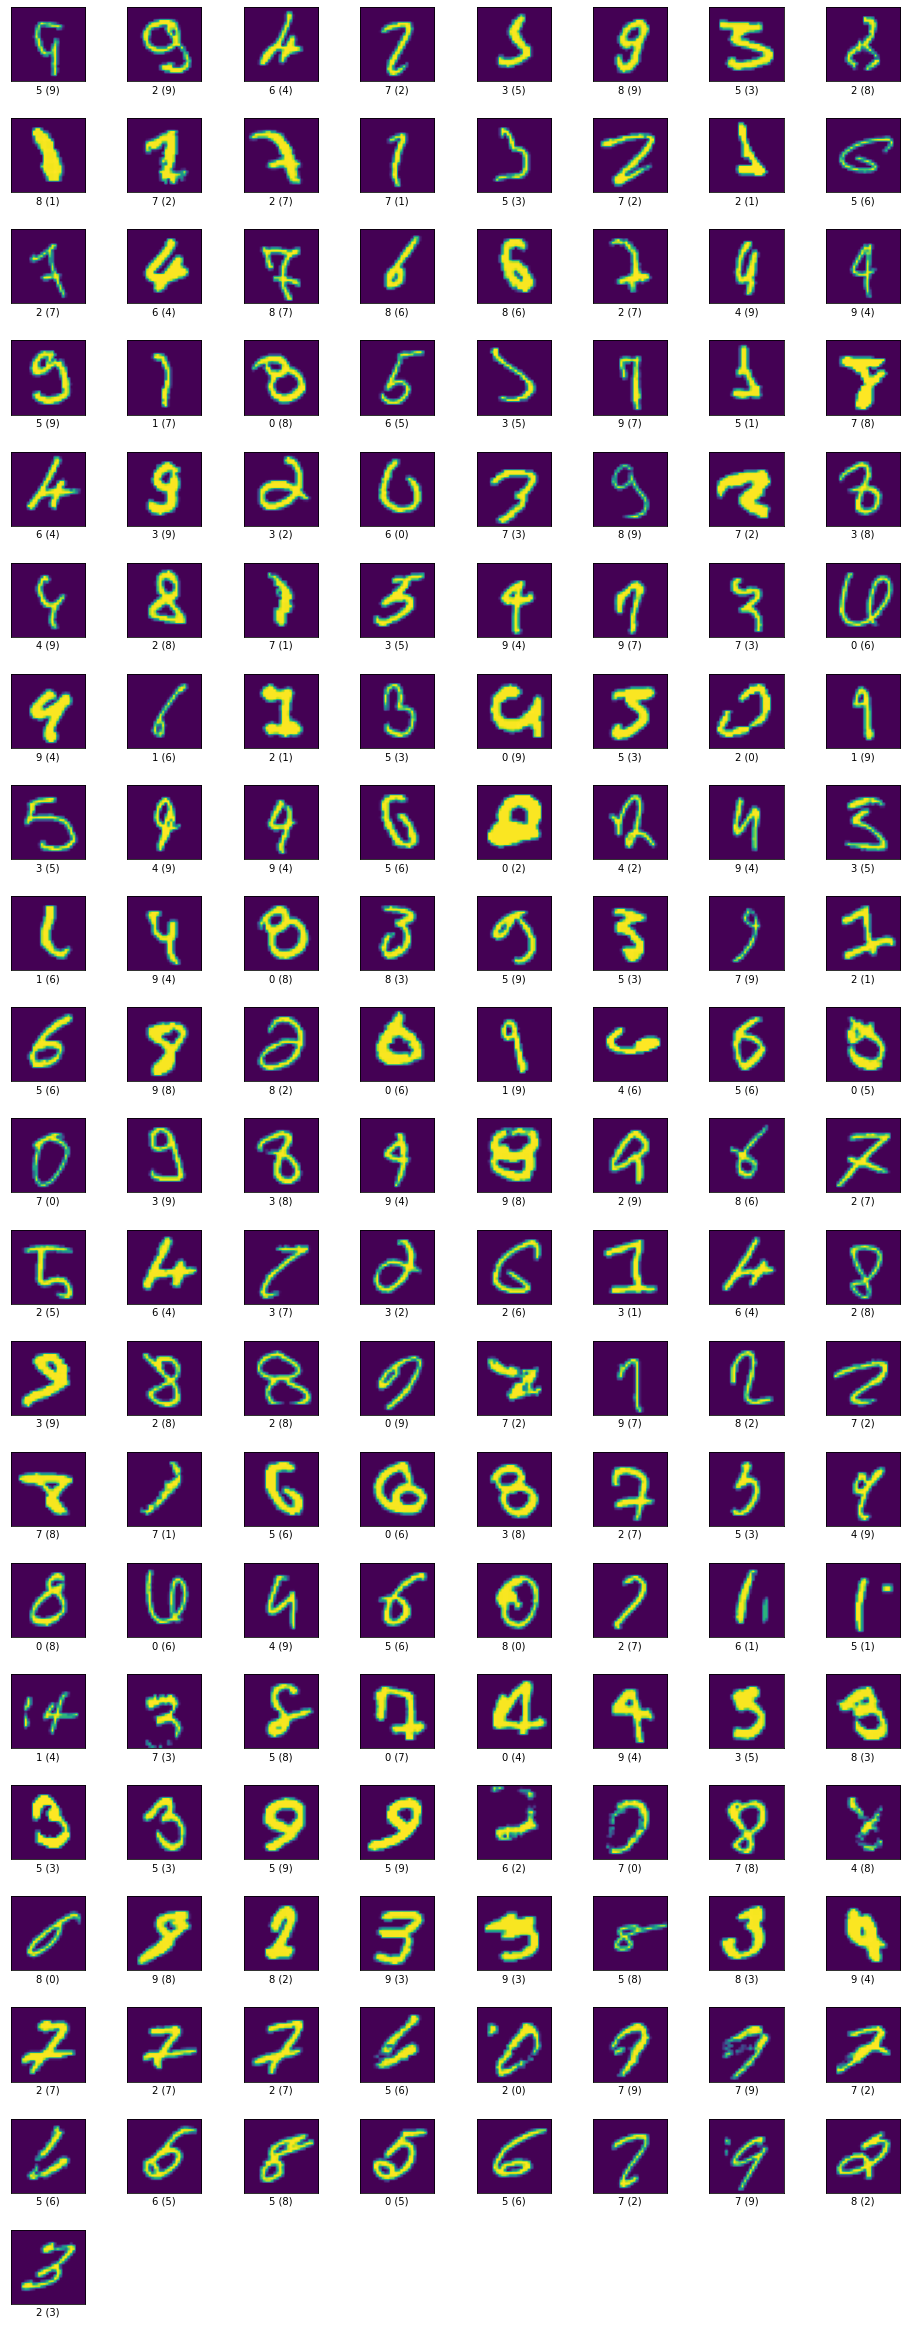

In [8]:
display_dataframe(missmatches, labels = labels.tolist(), cols=8)

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


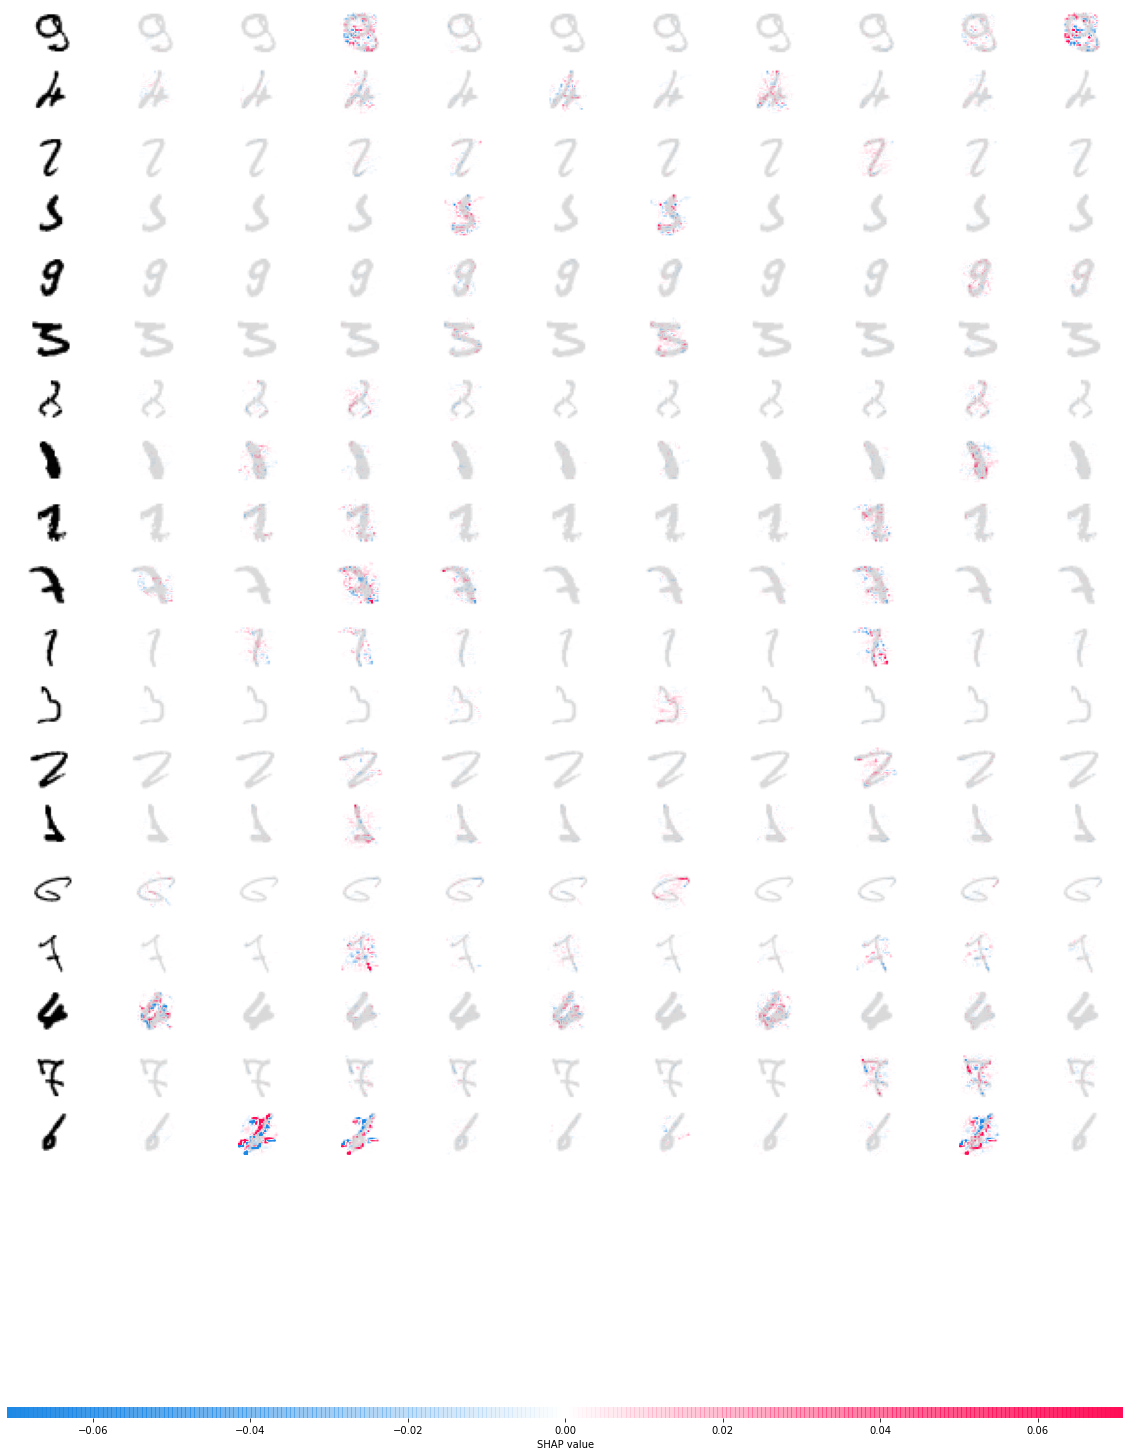

In [9]:
plot_shap(model, missmatches, elements=20)